In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost as xgb

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

# Read, pre-process and visualize data

In [2]:
data_set = pd.read_csv('Index closing price from 1994 to 2021.csv')
data_set.head()

,Date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,"2,224.95","3,446.00","18,124.01"
1,1994-01-10,475.27,"2,225.00","3,440.60","18,443.44"
2,1994-01-11,474.13,"2,228.10","3,413.80","18,485.25"
3,1994-01-12,474.17,"2,182.06","3,372.00","18,793.88"
4,1994-01-13,472.47,"2,142.37","3,360.00","18,577.26"


In [3]:
len(data_set)
data_set.isna().sum()

7255

Date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [4]:
data_set.columns

Index(['Date', 'spx', 'dax', 'ftse', 'nikkei'], dtype='object')

In [5]:
data_set['Date'] = pd.to_datetime(data_set['Date'])

# Extract features
data_set['year'] = data_set['Date'].dt.year
data_set['month'] = data_set['Date'].dt.month
data_set['day'] = data_set['Date'].dt.day
data_set['dayofweek'] = data_set['Date'].dt.dayofweek

# Now drop original Date
X = data_set.drop(columns=['spx', 'Date'])
y = data_set['spx']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_set.drop(columns = ['spx','Date']), data_set['spx'], test_size=0.2, random_state=50)
X_train
X_test
y_train
y_test

,dax,ftse,nikkei,year,month,day,dayofweek
2168,"5,041.20","5,125.50","11,552.79",2002,5,1,2
403,"2,237.73","3,454.30","16,387.25",1995,7,26,2
5835,"9,916.02","6,156.30","16,736.35",2016,5,20,4
100,"2,112.80","2,966.40","20,777.16",1994,5,27,4
1452,"5,107.68","6,250.70","17,969.93",1999,8,3,1
...,...,...,...,...,...,...,...
2014,"4,184.50","4,763.60","9,696.53",2001,9,27,3
6253,"13,070.02","7,620.70","22,911.21",2017,12,27,2
1931,"6,177.74","5,856.50","13,312.35",2001,6,4,0
5600,"11,492.43","6,753.70","20,706.15",2015,6,26,4


,dax,ftse,nikkei,year,month,day,dayofweek
7067,"14,011.80","6,531.60","29,505.93",2021,2,9,1
6311,"12,217.02","7,042.90","21,480.90",2018,3,19,0
5469,"9,922.11","6,598.20","17,808.75",2014,12,25,3
809,"3,256.86","4,327.10","18,688.06",1997,2,13,3
6801,"13,045.19","7,326.30","22,971.94",2020,2,3,0
...,...,...,...,...,...,...,...
4113,"5,854.14","5,256.10","10,060.21",2009,10,14,2
73,"2,194.09","3,098.30","19,882.18",1994,4,20,2
4751,"7,079.23","5,902.70","10,018.24",2012,3,26,0
810,"3,249.17","4,341.00","18,722.00",1997,2,14,4


2168   1,086.46
403      561.61
5835   2,052.32
100      457.33
1452   1,322.18
         ...   
2014   1,018.61
6253   2,682.62
1931   1,267.11
5600   2,101.49
5808   2,082.42
Name: spx, Length: 5804, dtype: float64

7067   3,911.23
6311   2,712.92
5469   2,081.88
809      811.82
6801   3,248.92
         ...   
4113   1,092.02
73       441.96
4751   1,416.51
810      808.48
1438   1,398.17
Name: spx, Length: 1451, dtype: float64

# Decison tree


In [7]:
clf = DecisionTreeRegressor(random_state=50)

clf = clf.fit(X_train, y_train) 

In [8]:
X_train.columns
clf.feature_importances_

Index(['dax', 'ftse', 'nikkei', 'year', 'month', 'day', 'dayofweek'], dtype='object')

array([1.80130676e-02, 6.90790795e-02, 1.45202956e-01, 7.64980584e-01,
       2.53228041e-03, 1.66467609e-04, 2.55655924e-05])

In [9]:
test_output = pd.DataFrame(clf.predict(X_test), index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['spx']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
abs(test_output['pred_spx'] - test_output['spx']).mean()/test_output['spx'].mean()

,pred_spx,spx
7067,"3,870.29","3,911.23"
6311,"2,716.94","2,712.92"
5469,"2,081.88","2,081.88"
809,801.77,811.82
6801,"3,232.39","3,248.92"


Mean absolute error is 
15.982175357747414


0.010271817179704261

## Bagging Regressor ## 

In [10]:
regr = BaggingRegressor(random_state=50, n_estimators = 200, max_samples = 1000)

regr = regr.fit(X_train, y_train) 

In [11]:
test_output = pd.DataFrame(regr.predict(X_test), index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['spx']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
abs(test_output['pred_spx'] - test_output['spx']).mean()/test_output['spx'].mean()

,pred_spx,spx
7067,"3,886.69","3,911.23"
6311,"2,678.00","2,712.92"
5469,"2,059.33","2,081.88"
809,796.31,811.82
6801,"3,198.22","3,248.92"


Mean absolute error is 
16.98255014410354


0.01091476262903289

## Random Forest Regressor 

In [12]:
rf = RandomForestRegressor(random_state=50, min_samples_leaf = 3, max_features = "sqrt")

rf = rf.fit(X_train, y_train) 


In [13]:
X_train.columns
rf.feature_importances_

Index(['dax', 'ftse', 'nikkei', 'year', 'month', 'day', 'dayofweek'], dtype='object')

array([3.50030134e-01, 1.70860318e-01, 1.51710791e-01, 3.22554660e-01,
       3.95373328e-03, 7.44566338e-04, 1.45797729e-04])

In [14]:
test_output = pd.DataFrame(rf.predict(X_test), index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['spx']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
abs(test_output['pred_spx'] - test_output['spx']).mean()/test_output['spx'].mean()

,pred_spx,spx
7067,"3,884.57","3,911.23"
6311,"2,669.53","2,712.92"
5469,"2,065.46","2,081.88"
809,797.33,811.82
6801,"3,088.12","3,248.92"


Mean absolute error is 
16.05147668270628


0.010316357458130357

## Gradeint Boosting Regressor

In [15]:
gb = GradientBoostingRegressor(random_state=50, min_samples_leaf = 2, max_depth = 4)

gb = gb.fit(X_train, y_train) 


In [16]:
X_train.columns
gb.feature_importances_

Index(['dax', 'ftse', 'nikkei', 'year', 'month', 'day', 'dayofweek'], dtype='object')

array([1.91315419e-01, 8.08723653e-02, 9.78540147e-02, 6.28323719e-01,
       1.60879045e-03, 2.43336033e-05, 1.35734536e-06])

In [17]:
test_output = pd.DataFrame(gb.predict(X_test), index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['spx']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
abs(test_output['pred_spx'] - test_output['spx']).mean()/test_output['spx'].mean()

,pred_spx,spx
7067,"3,889.93","3,911.23"
6311,"2,670.57","2,712.92"
5469,"2,036.53","2,081.88"
809,778.71,811.82
6801,"3,279.06","3,248.92"


Mean absolute error is 
20.01974493524916


0.01286678160864412

## XGBoost Regressor 

In [18]:
# XGBoost comes with its own class for storing datasets called DMatrix. 
# It is a highly optimized class for memory and speed. 
# That's why converting datasets into this format is a requirement for the native XGBoost API:


# Create regression matrices

dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)

dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [19]:
params = {"objective": "reg:squarederror", "tree_method": "exact", "max_depth" : 4, "learning_rate" : 0.1} # use "tree_method" : "hist" if you need speed

In [20]:
n = 100

model = xgb.train(

   params=params,

   dtrain=dtrain_reg,

   num_boost_round=n,

)

In [21]:
from sklearn.metrics import mean_squared_error
preds = model.predict(dtest_reg)


In [22]:
test_output = pd.DataFrame(preds, index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['spx']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
abs(test_output['pred_spx'] - test_output['spx']).mean()/test_output['spx'].mean()

,pred_spx,spx
7067,"3,892.08","3,911.23"
6311,"2,666.89","2,712.92"
5469,"2,036.56","2,081.88"
809,783.10,811.82
6801,"3,270.21","3,248.92"


Mean absolute error is 
20.76825962815931


0.013347855424303917

## Hybrid Model 

In [23]:
model = LinearRegression(fit_intercept = True)
model.fit(X_train, y_train) 

# The following gives the R-square score
model.score(X_train, y_train) 

LinearRegression()

0.9323702921822077

In [24]:
training_residuals = y_train - model.predict(X_train)

In [25]:
rf = RandomForestRegressor(random_state=50, min_samples_leaf = 3, max_features = "sqrt")

rf = rf.fit(X_train, training_residuals) 

In [26]:
pred_residuals = rf.predict(X_test)
y_pred = pred_residuals + model.predict(X_test)

In [27]:
test_output = pd.DataFrame(y_pred, index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['spx']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
abs(test_output['pred_spx'] - test_output['spx']).mean()/test_output['spx'].mean()

,pred_spx,spx
7067,"3,898.89","3,911.23"
6311,"2,703.73","2,712.92"
5469,"2,082.67","2,081.88"
809,801.13,811.82
6801,"3,189.67","3,248.92"


Mean absolute error is 
17.053470287482643


0.010960343329459594

## Plotting a Graph for Comparing Results


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Comparison of Mean Absolute Error (MAE) Across Models')

Text(0.5, 0, 'Models')

Text(0, 0.5, 'MAE (lower is better)')

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.0, 16.490000000000002, '15.99')

Text(1.0, 17.48, '16.98')

Text(2.0, 17.55, '17.05')

Text(3.0, 17.7, '17.20')

Text(4.0, 20.51, '20.01')

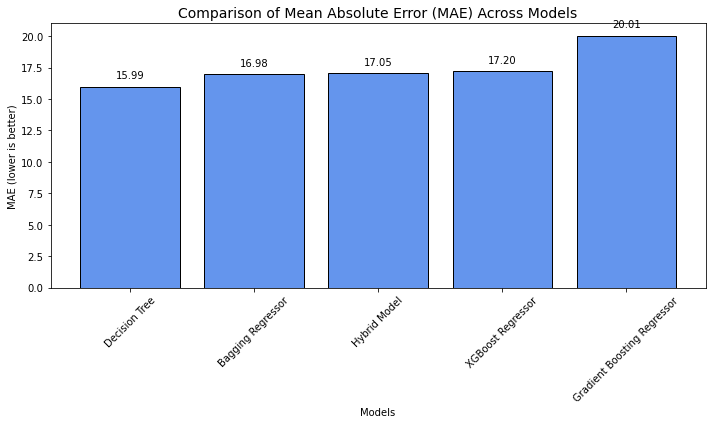

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Replace these with actual MAE or R² scores from your runs
model_names = [
    "Decision Tree", 
    "Bagging Regressor", 
    "Hybrid Model", 
    "XGBoost Regressor", 
    "Gradient Boosting Regressor"
]

# Example scores — update with your real MAEs or R² values
model_scores = [
    15.99,   # Decision Tree
    16.98,   # Bagging Regressor
    17.05,   # Hybrid Model
    17.20,   # XGBoost Regressor
    20.01,   # Gradient Boosting Regressor
]

# Create DataFrame
df = pd.DataFrame({'Model': model_names, 'MAE': model_scores})

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Model'], df['MAE'], color='cornflowerblue', edgecolor='black')
plt.title('Comparison of Mean Absolute Error (MAE) Across Models', fontsize=14)
plt.xlabel('Models')
plt.ylabel('MAE (lower is better)')
plt.xticks(rotation=45)

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
